**Question 12**: Consider the one-dimensional, time-independent Schroedinger equation describing a particle with wave function $\psi(x)$ and energy $E$: $$-\frac{\hbar^{2}}{2\,m}\,\frac{d^{2}\psi(x)}{dx^{2}} + V(x)\,\psi(x) = E\,\psi(x).$$ Values for the constants $m$, $\hbar$ and others required for the calculation in SI units are given in the code cell below. (Note: the energy unit eV is taken as elementary charge $e$ times Volts with $e$ given as a constant.]

**Tasks**: 

**(a)** Consider a square potential well with $V(x)=0$ in between two infinitely high walls separated by a distance $L$ equal to the Bohr radius, i.e. for all x in the interval $[0,L]$. Write a function `solve(energy, func)` which takes the parameter energy and a python function $func$. This function should solve the Schroedinger ODE for the case described above and return only the final value of $\psi(L)$ at the boundary $L$. 

Write a function `eqn(x, y, energy)` containing the two first-order differential equations equivalent to the Schroedinger equation. Use this function as input for the `solve(energy, func)` function. This detailed naming scheme is required for the first tests of your code.

Write a script using the function `solve(energy, func)` to calculate the ground state energy of an electron in this potential well in units of eV. For the number of values to solve for $\psi(x)$ the value 1000 is recommended. The required precision for the root finding method is 1.e-22 (set explicitly since less precision has consequences for part (c)).

One of the tests will assess your `solve(energy, func)` function for a distorted potential well.

**(b)** Consider the harmonic potential $$V(x)=V_{0}\,x^{2}/a^{2},$$ where $V_{0}$ and $a=10^{-11}$ m are constants. Limit the infinite range of the variable $x$ to the interval $[-10a, 10a]$ with $V_{0}=50$ eV. The harmonic oscillator is known to have equidistant energy eigenvalues. Check that this is true, to the precision of your calculation, by calculating the ground state and the first 2 excited states.

In order to test your result, write a function `result()` which must return the difference of calculated energy eigenvalues in eV as a single number. As stated above, the absolute difference between the ground and first state and the first and second state should be very close to equal. Either of those two numbers should be returned. Consider that this is merely a function to enable automated testing and hence should really only return the requested value. Calculations should take place earlier in your code so that `result()` can run without an input argument.

**(c)** Plot the normalized wavefunctions, for the ground state energy and the two excited state energies as obtained without normalization in part (b). Note that normalization of a wavefunction requires the calculation of the integral of the square of the wavefunction $\int|\psi(x)|^{2}dx$ and subsequent division of $\psi(x)$ by the square root of the integral. 

Plot all three wavefunctions onto a single canvas.

Take a simple initial condition for both problems at $x_{0}=0$ or $x_{0}=-10a$, respectively: $\psi(x_{0})=0$ and $d\psi(x_{0})/dx=1$. Use that as a starting point to solve the ODE and vary the energy, $E$, until a solution converges. The task is to evaluate the variation of the energy variable until the second boundary condition (for instance at L for exercise (a)) is satisfied since the first boundary condition is already satisfied due to the choice of initial condition. 

This requires an initial guess for the energy interval in which the solution might be and a computational method for root finding. Search scipy for root finding methods and select one which does not require knowledge of the derivative. Root finding is appropriate here since the boundary condition to satisfy is $\psi(x)=0$ to a given precision.

**Quantum physics background** For those lacking the first year quantum module, the boundary condition for both exercises is that $\psi(x)=0$ at each potential boundary. These are only fulfilled at specific, discrete energy values $E$, called energy eigenvalues, where the smallest of these is called the ground state energy.

In [1]:
''' Solving the Schroedinger equation'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize

#required physical constants given in SI units
m_el   = 9.1094e-31      # mass of electron in [kg]
hbar   = 1.0546e-34      # Planck's constant over 2 pi [Js]
e_el   = 1.6022e-19      # electron charge in [C]
L_bohr = 5.2918e-11      # Bohr radius [m]

# (a)

def solve(energy, func):
    '''Solves the Schroedinger equation and returns the final value at
    the boundary i.e. the Bohr radius'''
    t = np.linspace(0, L_bohr, 1000)
    sol = solve_ivp(func, t_span=[t[0], t[-1]], y0 = [0, 1], t_eval=t, args=(energy,))
    psi_array = sol.y[0]
    return psi_array[-1]
def eqn(x, y, energy):
    '''Contains the two first-order differential equations equivalent
    to the Schroedinger equation with V(x)=0'''
    _=x #unused
    psi = y[0]
    dpsi = y[1]
    return[dpsi, -2*(m_el)*(energy)*(psi)/(hbar**2)]

gse = optimize.brentq(solve,2.14e-17, 2.17e-17, args=(eqn,), xtol=1e-22)
gse_scaled = gse/e_el
print(gse_scaled)


134.1821794710043


Ground state energy = 137.98785569629425
First excited state energy = 413.8263370149981
Second excited state energy = 689.735572483843


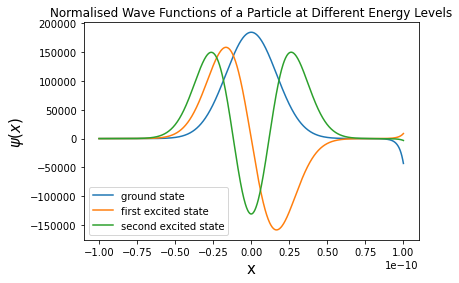

In [2]:
# solution to parts (b), (c)

#(b)
a = 1e-11

def eqn2(x, y, energy):
    '''Contains the two first-order differential equations equivalent
    to the Schroedinger equation with a non-zero potential well'''
    psi = y[0]
    dpsi = y[1]
    d2psi = (-2*m_el/(hbar**2))*(energy - (8.011e-18)*(x**2)/(a**2))*psi
    return[dpsi, d2psi]

def solve2(energy):
    '''Solves the Schroedinger equation and returns the final value at
    the boundary i.e. 10*a where a=10**-11'''
    t = np.linspace(-10*a, 10*a, 1000)
    sol = solve_ivp(eqn2, t_span=[t[0], t[-1]], y0 = [0, 1], t_eval=t, args=(energy,))
    psi_array = sol.y[0]
    return psi_array[-1]

E1 = optimize.brentq(solve2,100*e_el, 200*e_el, xtol=1e-22)
E2 = optimize.brentq(solve2,375*e_el, 477*e_el, xtol=1e-22)
E3 = optimize.brentq(solve2,650*e_el, 754*e_el, xtol=1e-22)

ground_state = E1/e_el
first_state = E2/e_el
second_state = E3/e_el

print('Ground state energy =',ground_state)
print('First excited state energy =',first_state)
print('Second excited state energy =',second_state)

def result():
    '''Returns the absolute difference between the ground and first
    state in eV'''
    return np.abs(ground_state - first_state)

#(c)
my_t, step= np.linspace(-10*a, 10*a, 1000, retstep=True)
def solve3(energy):
    '''Solves the Schroedinger equation and returns an array of wave
    functions at each point of xvalue array'''
    sol = solve_ivp(eqn2, t_span=[my_t[0], my_t[-1]], y0 = [0, 1], t_eval=my_t, args=(energy,))
    psi_array = sol.y[0]
    return psi_array

wavefuncs1 = solve3(E1)
wavefuncs2 = solve3(E2)
wavefuncs3 = solve3(E3)

integral1=0
for i in wavefuncs1:
    integral1 += step*np.abs(i)**2
normal_psi1 = wavefuncs1/np.sqrt(integral1)

integral2=0
for i in wavefuncs2:
    integral2 += step*np.abs(i)**2
normal_psi2 = wavefuncs2/np.sqrt(integral2)

integral3=0
for i in wavefuncs3:
    integral3 += step*np.abs(i)**2
normal_psi3 = wavefuncs3/np.sqrt(integral3)

plt.plot(my_t, normal_psi1, label='ground state')
plt.plot(my_t, normal_psi2, label='first excited state')
plt.plot(my_t, normal_psi3, label='second excited state')
plt.title('Normalised Wave Functions of a Particle at Different Energy Levels')
plt.xlabel('x', size=15)
plt.ylabel(r'$\psi(x)$', size=15)
plt.legend()
plt.show()


In [ ]:
# Hidden test for (a)


In [3]:
# Test for (b)
assert (result()>275.0 and result()<277.0), 'wrong energy eigenvalue difference.'